## Análisis de Datos Exploratorio de datos de TIMESAT


Equipo:



*   Martha Juarez 
*   Adilene Calderón
*   Paola Velez
*   Benjamin Lopez
*   Carlos Velázquez
*   Ibsan Morales
*   Manuel Valenzuela
*   Samuel Cortez

## Importando librerias necesarias

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Lectura de Datos

In [10]:
datos_evi = pd.read_excel('/home/carlos/Documents/Maestria/materias/estadistica/EDA_Estadistica/EDA_Estadistica/Material Sara Dennis/TIMESAT/EVI/VAR_FEN_EVI_D&F.xlsx')

In [11]:
datos_ndvi = pd.read_excel('/home/carlos/Documents/Maestria/materias/estadistica/EDA_Estadistica/EDA_Estadistica/Material Sara Dennis/TIMESAT/NDVI/VAR_FEN_NDVI_D&F.xlsx')

## Explorando Datos EVI (variables fenologicas)

In [12]:
#Observamos los 5 primeros registros de los datos
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [13]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_evi.shape[0]}")
print(f"Columnas: {datos_evi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [14]:
#Cambiando tipo de datos
datos_evi['CLASE_VEG'] = datos_evi['CLASE_VEG'].astype('category')
datos_evi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [15]:
#Observando valores perdidos
datos_evi.isnull().sum()

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [16]:
#Observando valores duplicados
duplicate_rows_df = datos_evi[datos_evi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [17]:
#Renombrando columnas
datos_evi = datos_evi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA

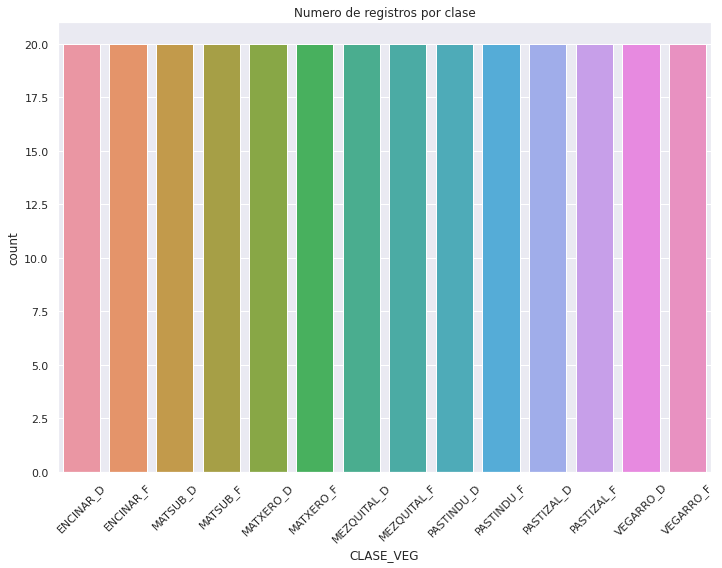

In [18]:
#Analizando numero de registros por clase
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_evi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

In [19]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_evi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                            AMPLITUD              \
                mean     min     max        std     mean   min   max   
CLASE_VEG                                                              
ENCINAR_D    187.352   78.40  207.36  27.381708  2139.55  1259  2669   
ENCINAR_F    186.856  169.60  204.80   9.686387  2809.75  2030  3420   
MATSUB_D     188.368  168.64  211.20  10.980723  3220.55  2012  3933   
MATSUB_F     186.672  165.92  201.60  10.114507  3522.30  2840  4376   
MATXERO_D    189.696  168.48  208.00  10.710431  2458.80  1782  3196   
MATXERO_F    187.352  165.76  200.00  10.009710  2291.35  1743  2897   
MEZQUITAL_D  181.816  108.80  202.56  26.617934  1953.30  1082  2635   
MEZQUITAL_F  171.848   83.20  196.80  35.636168  2203.25  1308  2737   
PASTINDU_D   188.656  165.44  200.00  10.268106  2995.05  2195  3975   
PASTINDU_F   187.856  164.00  200.00  10.010709  2766.65  1721  3970   
PASTIZAL_D   192.552  172.32  203.20   9.563224  1821.70  1085  2405   
PASTIZAL_F   188.520  175.36  200.00   7.801128  3139.25  2451  3572   
VEGARRO_D    189.720  169.28  204.80   9.877515  2545.75  1598  3159   
VEGARRO_F    187.664  167.52  201.60   9.917541  2960.50  2163  3467   

                         DURACION                                 INTMEN  \
                    std      mean      min      max        std      mean   
CLASE_VEG                                                                  
ENCINAR_D    348.994869  187.6432  109.360  305.120  62.833629  15681.80   
ENCINAR_F    362.384628  133.4392  111.568  163.360  12.443532  17304.50   
MATSUB_D     503.584047  120.4032   93.568  261.920  36.739992  17162.50   
MATSUB_F     410.115273  117.4232   92.720  158.976  16.276855  19257.00   
MATXERO_D    404.766417  153.9768  104.272  278.400  51.252368  15549.00   
MATXERO_F    326.647609  140.7792  101.792  231.040  34.402063  14085.40   
MEZQUITAL_D  445.375903  147.3256  106.768  224.160  35.042394  12407.40   
MEZQUITAL_F  429.482660  145.5240   98.256  255.360  46.587695  13578.55   
PASTINDU_D   531.821742  144.7928   97.280  267.200  46.609155  18269.50   
PASTINDU_F   612.723710  162.5352  108.416  300.320  64.213721  17569.50   
PASTIZAL_D   333.396729  161.2272  104.176  222.880  33.016983  12425.90   
PASTIZAL_F   336.723512  137.2688  105.600  184.320  22.662634  19103.50   
VEGARRO_D    401.263777  136.2800  106.000  199.520  27.156629  15330.00   
VEGARRO_F    365.499154  123.7344   98.480  169.280  16.897372  16938.00   

                                        
               min    max          std  
CLASE_VEG                               
ENCINAR_D     9286  24090  4080.378409  
ENCINAR_F    12560  21910  2608.353937  
MATSUB_D     10510  21860  3173.196753  
MATSUB_F     13550  25430  3033.112176  
MATXERO_D    10270  21670  2935.438459  
MATXERO_F     9278  18570  2646.317409  
MEZQUITAL_D   6475  16880  2801.411437  
MEZQUITAL_F   9442  17890  2379.999811  
PASTINDU_D   10640  25280  4191.493233  
PASTINDU_F   10560  23020  3458.976841  
PASTIZAL_D    7204  17950  3105.944062  
PASTIZAL_F   13960  24880  3219.626122  
VEGARRO_D     9860  20750  3049.897324  
VEGARRO_F    12290  21930  2599.553808

### Histogramas

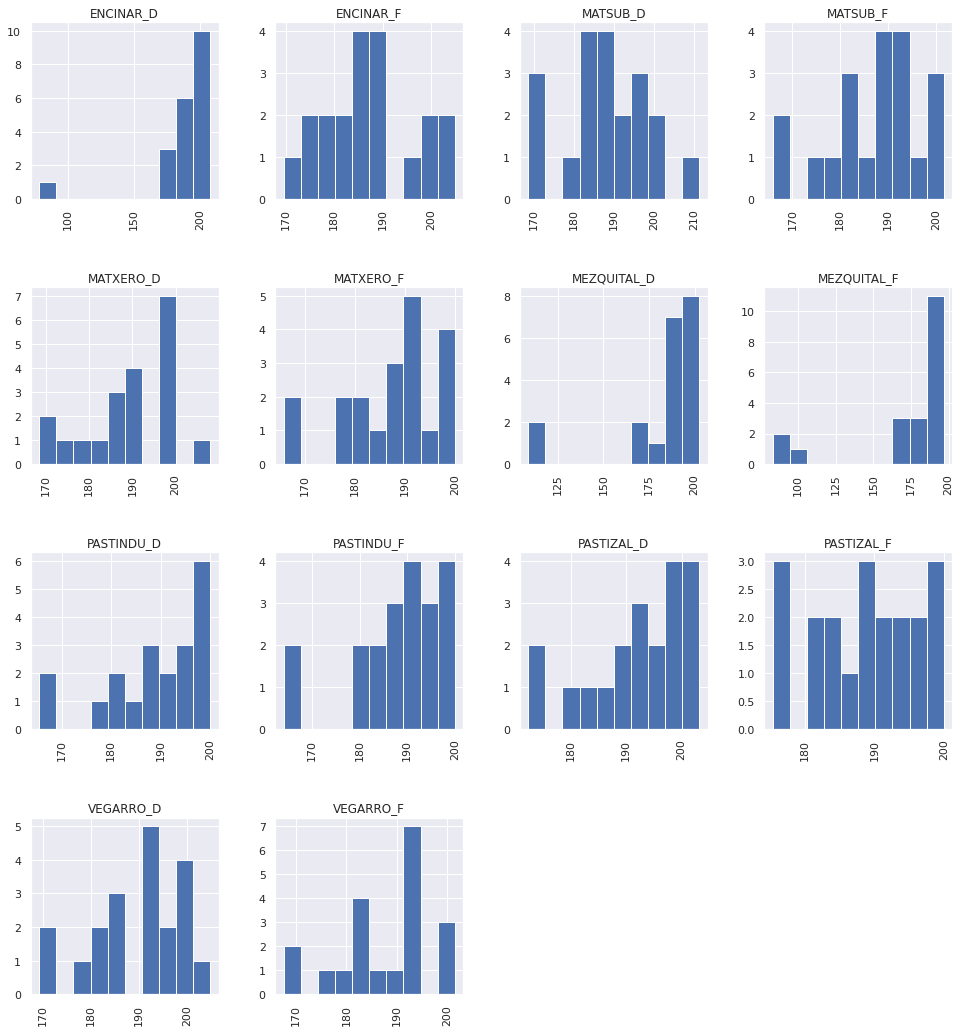

In [20]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['INICIO']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));


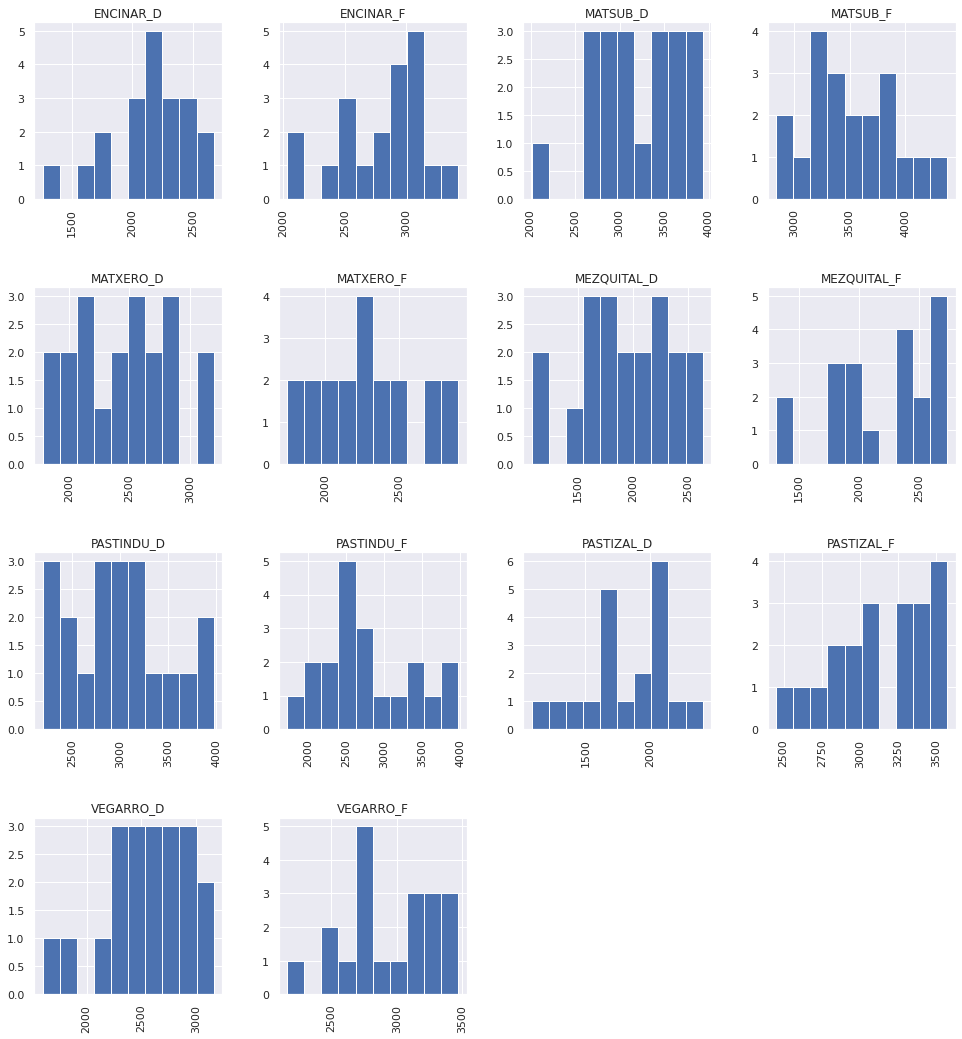

In [21]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['AMPLITUD']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

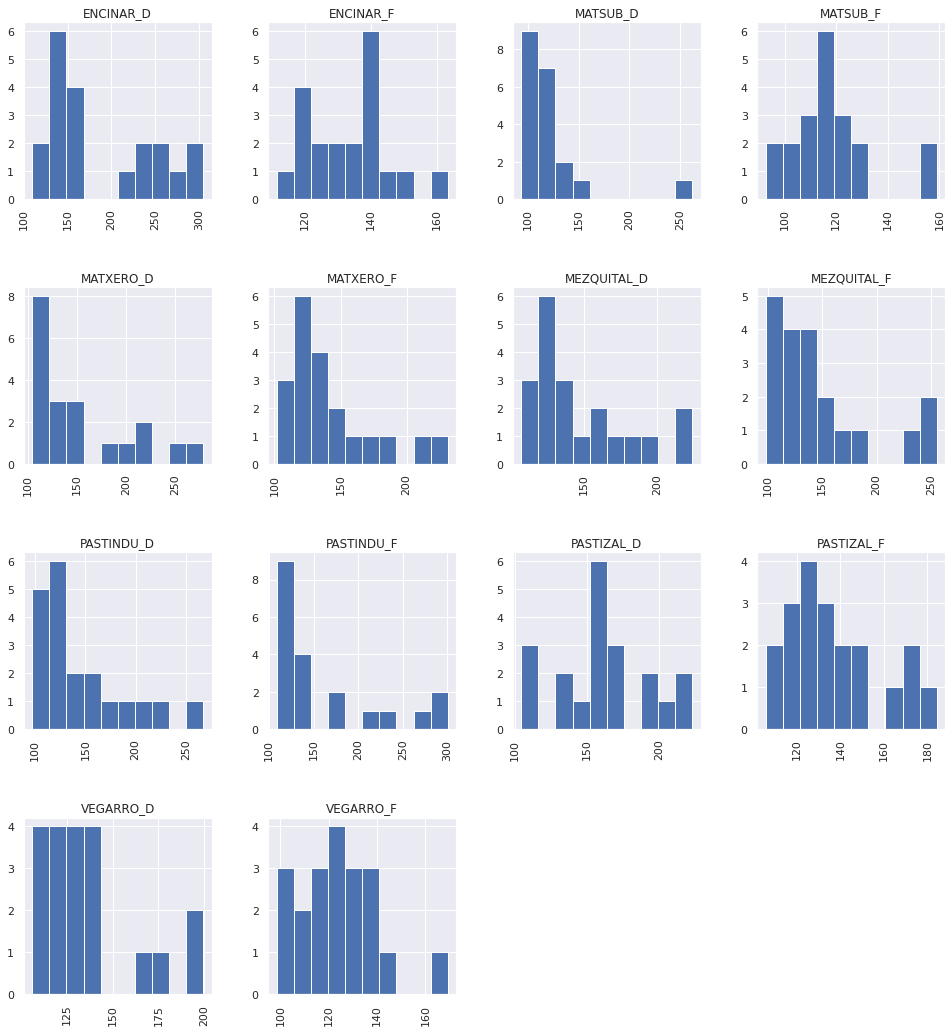

In [22]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['DURACION']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

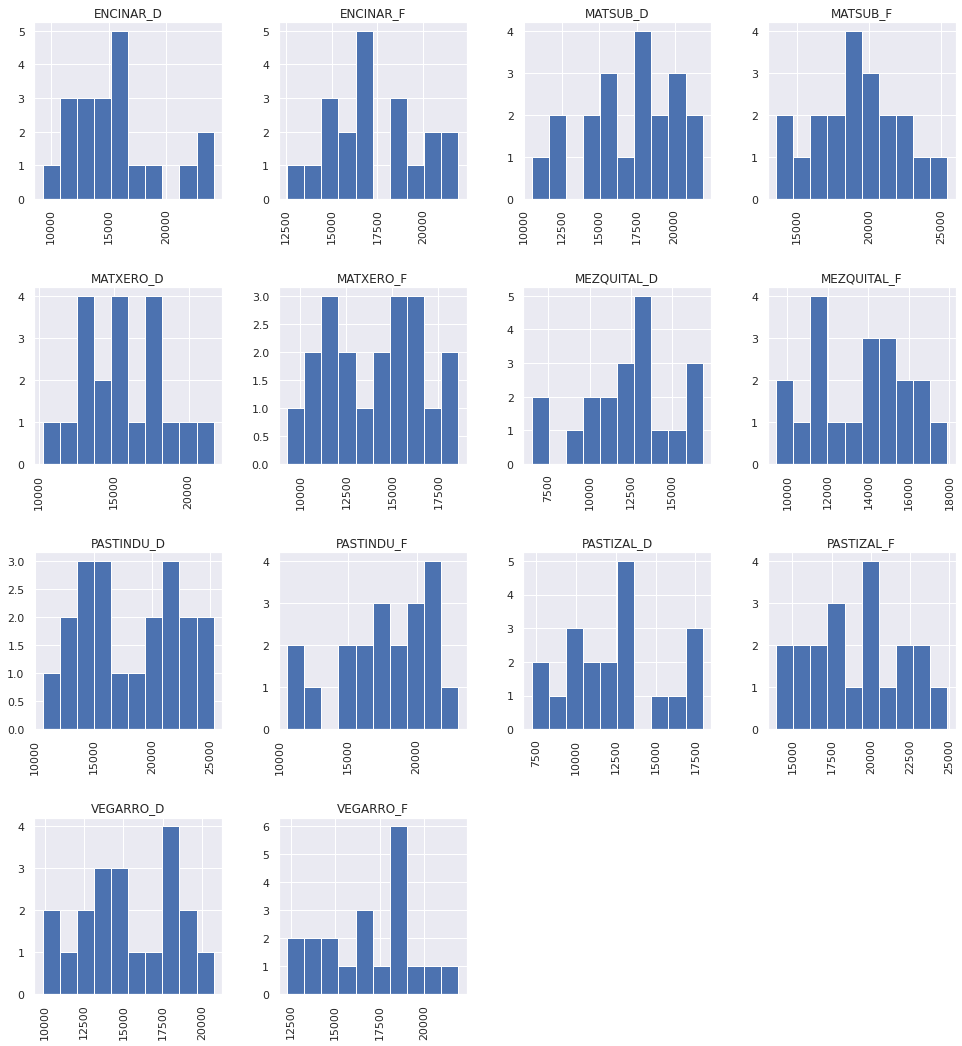

In [23]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['INTMEN']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de Caja

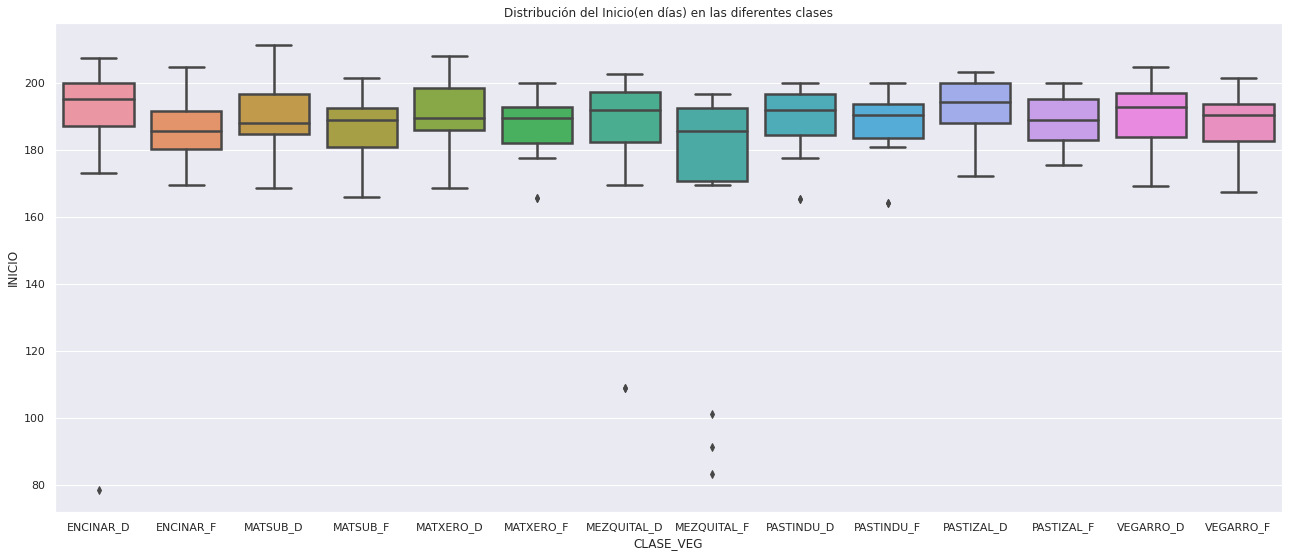

In [24]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

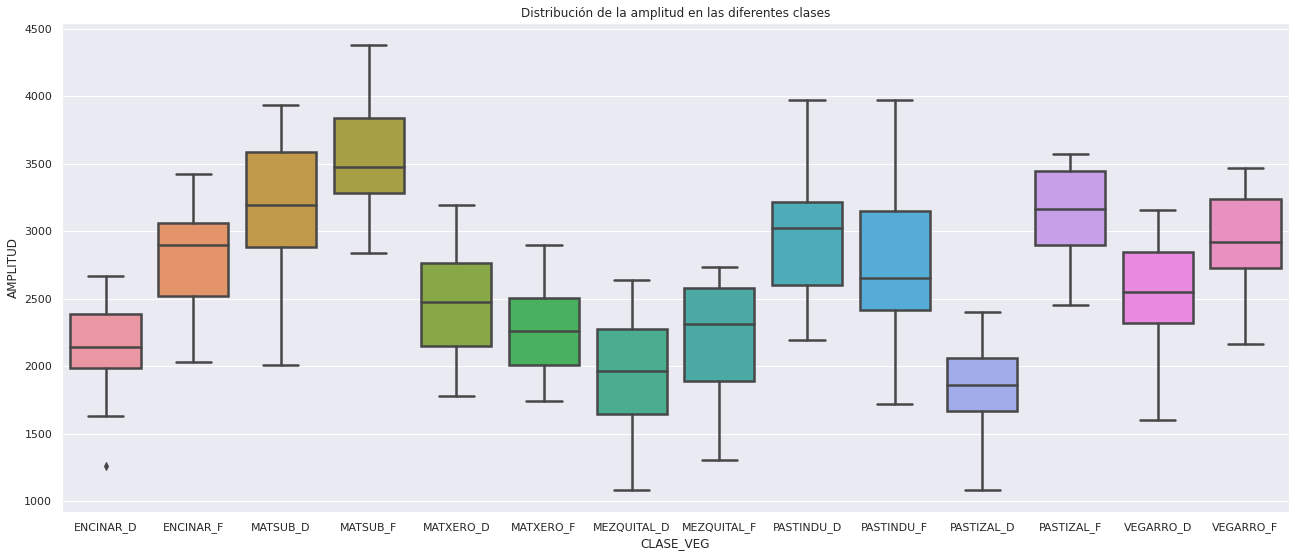

In [25]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="AMPLITUD", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la amplitud en las diferentes clases');

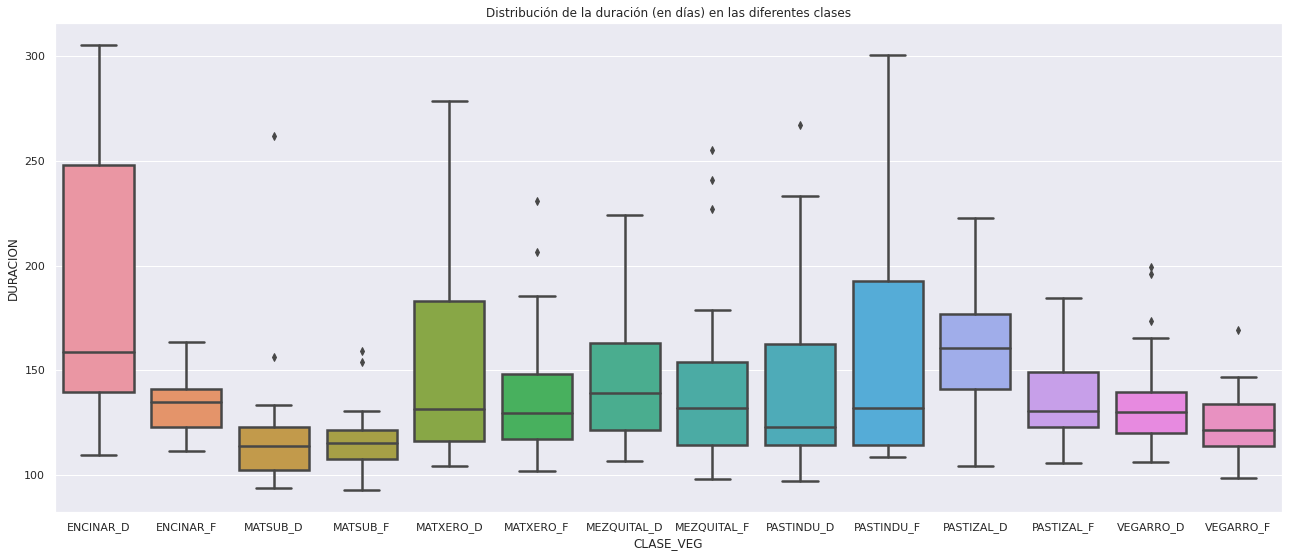

In [26]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

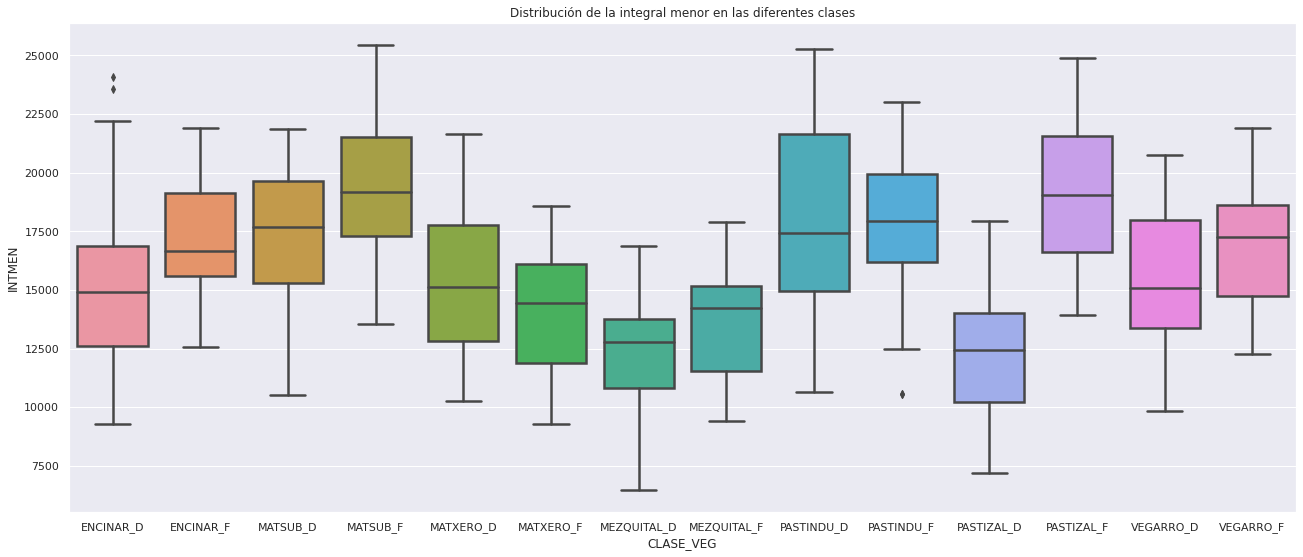

In [27]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INTMEN", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la integral menor en las diferentes clases');

### ANOVA

Supuestos:
*   Variable respuesta está normalmente distribuida (Shapiro Test, ya que el numero de muestras no permite apreciar el histograma)
*   Hay homogeneidad en las varianzas

#### Pruebas de normalidad

In [28]:
from scipy import stats

def shapiro_prueba(data, columna):
    '''
    Función que realiza la prueba de Shapiro-Wilks para los valores de cada una de las categorías
    existentes en clase_veg, imprime los resultados de la prueba para un nivel de significancia del 0.05.

    Recibe: 
    *   datos: Dataframe que contiene la columna CLASE_VEG con las diferentes categorias
    *   columna: Columna en la cual se desea realizar la prueba de Shapiro

    Regresa:
    None
    '''

    print(f'Prueba de Shapiro-Wilks para la columna {columna}')
    for clase_veg in data['CLASE_VEG'].unique():
        data_filtered = data[data['CLASE_VEG'] == clase_veg].copy()
        shapiro_test = stats.shapiro(data_filtered[columna])
        print(f'Shapiro Test para CLASE_VEG = {clase_veg} : {shapiro_test}')
        if shapiro_test.pvalue < 0.05:
            print('!!!!! Hay evidencia para rechazar Ho !!!')
        print('*'*30)

In [29]:
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [30]:
shapiro_prueba(datos_evi, 'INICIO')

Prueba de Shapiro-Wilks para la columna INICIO
Shapiro Test para CLASE_VEG = ENCINAR_D : ShapiroResult(statistic=0.5477151870727539, pvalue=8.856678164192999e-07)
!!!!! Hay evidencia para rechazar Ho !!!
******************************
Shapiro Test para CLASE_VEG = ENCINAR_F : ShapiroResult(statistic=0.9782832860946655, pvalue=0.910054087638855)
******************************
Shapiro Test para CLASE_VEG = MATSUB_D : ShapiroResult(statistic=0.966446578502655, pvalue=0.6787868738174438)
******************************
Shapiro Test para CLASE_VEG = MATSUB_F : ShapiroResult(statistic=0.9396016001701355, pvalue=0.23565584421157837)
******************************
Shapiro Test para CLASE_VEG = MATXERO_D : ShapiroResult(statistic=0.9370118379592896, pvalue=0.21042150259017944)
******************************
Shapiro Test para CLASE_VEG = MATXERO_F : ShapiroResult(statistic=0.914262056350708, pvalue=0.0768791139125824)
******************************
Shapiro Test para CLASE_VEG = MEZQUITAL_D : Shap

In [31]:
import pingouin as pg

# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos_evi, dv='INICIO', group='CLASE_VEG')

,W,pval,normal
ENCINAR_D,0.547715,8.856678e-07,False
ENCINAR_F,0.978283,9.100541e-01,True
MATSUB_D,0.966447,6.787869e-01,True
MATSUB_F,0.939602,2.356558e-01,True
MATXERO_D,0.937012,2.104215e-01,True
MATXERO_F,0.914262,7.687911e-02,True
MEZQUITAL_D,0.654118,1.130814e-05,False
MEZQUITAL_F,0.654227,1.134009e-05,False
PASTINDU_D,0.863646,9.102780e-03,False
PASTINDU_F,0.867210,1.049849e-02,False


In [37]:
pg.normality(data=datos_evi, dv='AMPLITUD', group='CLASE_VEG')

,W,pval,normal
ENCINAR_D,0.958005,0.504804,True
ENCINAR_F,0.949741,0.363173,True
MATSUB_D,0.939740,0.237079,True
MATSUB_F,0.976913,0.888342,True
MATXERO_D,0.975406,0.862225,True
MATXERO_F,0.971411,0.784362,True
MEZQUITAL_D,0.961909,0.582656,True
MEZQUITAL_F,0.926694,0.133357,True
PASTINDU_D,0.957867,0.502174,True
PASTINDU_F,0.962803,0.601242,True


In [38]:
pg.normality(data=datos_evi, dv='DURACION', group='CLASE_VEG')

,W,pval,normal
ENCINAR_D,0.883984,0.020881,False
ENCINAR_F,0.964503,0.637149,True
MATSUB_D,0.613258,0.000004,False
MATSUB_F,0.887669,0.024372,False
MATXERO_D,0.832578,0.002759,False
MATXERO_F,0.841138,0.003800,False
MEZQUITAL_D,0.880317,0.017926,False
MEZQUITAL_F,0.824943,0.002085,False
PASTINDU_D,0.838616,0.003456,False
PASTINDU_F,0.789500,0.000605,False


In [39]:
pg.normality(data=datos_evi, dv='INTMEN', group='CLASE_VEG')

,W,pval,normal
ENCINAR_D,0.932468,0.172243,True
ENCINAR_F,0.968451,0.721882,True
MATSUB_D,0.965593,0.660457,True
MATSUB_F,0.991190,0.999210,True
MATXERO_D,0.969918,0.753137,True
MATXERO_F,0.961692,0.578176,True
MEZQUITAL_D,0.968203,0.716569,True
MEZQUITAL_F,0.958616,0.516590,True
PASTINDU_D,0.951327,0.387676,True
PASTINDU_F,0.936557,0.206258,True


#### Pruebas de Homogeneidad de Varianzas

In [40]:
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [41]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=datos_evi, dv='INICIO', group='CLASE_VEG', method='levene')

,W,pval,equal_var
levene,1.601126,0.084538,True


In [42]:
pg.homoscedasticity(data=datos_evi, dv='AMPLITUD', group='CLASE_VEG', method='levene')

,W,pval,equal_var
levene,1.552814,0.098878,True


In [43]:
pg.homoscedasticity(data=datos_evi, dv='DURACION', group='CLASE_VEG', method='levene')

,W,pval,equal_var
levene,3.4575,0.000057,False


In [44]:
pg.homoscedasticity(data=datos_evi, dv='INTMEN', group='CLASE_VEG', method='levene')

,W,pval,equal_var
levene,1.144907,0.321351,True


### ANOVA

In [47]:
# One Way ANOVA
# ==============================================================================
pg.anova(data=datos_evi, dv='DURACION', between='CLASE_VEG', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,CLASE_VEG,91165.947868,13,7012.765221,4.493532,6.352825e-07,0.180065
1,Within,415128.992986,266,1560.635312,NaN,NaN,NaN


### Prueba Post-Hoc

In [49]:
tukey_results = pg.pairwise_tukey(data=datos_evi, dv='DURACION', between='CLASE_VEG')
tukey_results

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,ENCINAR_D,ENCINAR_F,187.6432,133.4392,54.2040,12.492539,4.338910,0.001640,1.344824
1,ENCINAR_D,MATSUB_D,187.6432,120.4032,67.2400,12.492539,5.382413,0.000014,1.668252
2,ENCINAR_D,MATSUB_F,187.6432,117.4232,70.2200,12.492539,5.620955,0.000004,1.742187
3,ENCINAR_D,MATXERO_D,187.6432,153.9768,33.6664,12.492539,2.694921,0.287766,0.835277
4,ENCINAR_D,MATXERO_F,187.6432,140.7792,46.8640,12.492539,3.751359,0.015189,1.162715
...,...,...,...,...,...,...,...,...,...
86,PASTIZAL_D,VEGARRO_D,161.2272,136.2800,24.9472,12.492539,1.996968,0.768352,0.618950
87,PASTIZAL_D,VEGARRO_F,161.2272,123.7344,37.4928,12.492539,3.001215,0.144411,0.930212
88,PASTIZAL_F,VEGARRO_D,137.2688,136.2800,0.9888,12.492539,0.079151,1.000000,0.024533
89,PASTIZAL_F,VEGARRO_F,137.2688,123.7344,13.5344,12.492539,1.083399,0.998347,0.335794


In [51]:
#Filtramos los que no pasaron la prueba con un nivel de significancia del 5%
tukey_results[tukey_results['p-tukey'] < 0.05]

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,ENCINAR_D,ENCINAR_F,187.6432,133.4392,54.2040,12.492539,4.338910,0.001640,1.344824
1,ENCINAR_D,MATSUB_D,187.6432,120.4032,67.2400,12.492539,5.382413,0.000014,1.668252
2,ENCINAR_D,MATSUB_F,187.6432,117.4232,70.2200,12.492539,5.620955,0.000004,1.742187
4,ENCINAR_D,MATXERO_F,187.6432,140.7792,46.8640,12.492539,3.751359,0.015189,1.162715
7,ENCINAR_D,PASTINDU_D,187.6432,144.7928,42.8504,12.492539,3.430079,0.043584,1.063136
10,ENCINAR_D,PASTIZAL_F,187.6432,137.2688,50.3744,12.492539,4.032359,0.005479,1.249810
11,ENCINAR_D,VEGARRO_D,187.6432,136.2800,51.3632,12.492539,4.111510,0.004049,1.274342
12,ENCINAR_D,VEGARRO_F,187.6432,123.7344,63.9088,12.492539,5.115757,0.000052,1.585604
41,MATSUB_F,PASTINDU_F,117.4232,162.5352,-45.1120,12.492539,-3.611115,0.024436,-1.119248
42,MATSUB_F,PASTIZAL_D,117.4232,161.2272,-43.8040,12.492539,-3.506413,0.034318,-1.086795


TODO: donde no se cumple homogeneidad de varianzas posible kruskall wallis ??
TODO: Tambien posible prueba de aleatorizacion

### Removiendo Outliers

Duda: ¿Si Sara Dennis eligió estos datos a partir de otras BDD, es necesario remover outliers?

In [36]:
#Para remover outliers utilizaremos Isolation Forest
model = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

model.fit(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

print(model.get_params())

NameError: name 'IsolationForest' is not defined

In [ ]:
datos_evi['scores'] = model.decision_function(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

datos_evi['anomaly_score'] = model.predict(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])


In [ ]:
datos_evi[datos_evi['anomaly_score'] == -1]

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN,scores,anomaly_score
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480,-0.013272,-1
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580,-0.055369,-1
6,ENCINAR_D,142.90,138,78.40,1259,15.950,255.200,41880,12100,-0.166956,-1
10,ENCINAR_D,241.20,230,179.20,2230,19.070,305.120,54670,23590,-0.077514,-1
18,ENCINAR_D,426.40,414,198.40,2454,14.610,233.760,46750,22220,-0.002533,-1
19,ENCINAR_D,448.40,437,182.40,2266,17.870,285.920,54860,24090,-0.062597,-1
45,MATSUB_D,127.30,115,196.80,3010,16.370,261.920,42990,20200,-0.015974,-1
46,MATSUB_D,151.20,138,211.20,2716,5.848,93.568,22740,12190,-0.030548,-1
71,MATSUB_F,265.50,253,200.00,4130,7.195,115.120,34420,22240,-0.011573,-1
75,MATSUB_F,357.00,345,192.00,4376,6.602,105.632,32050,21470,-0.036483,-1


In [ ]:
datos_evi_limpios = datos_evi[datos_evi['anomaly_score'] == 1]

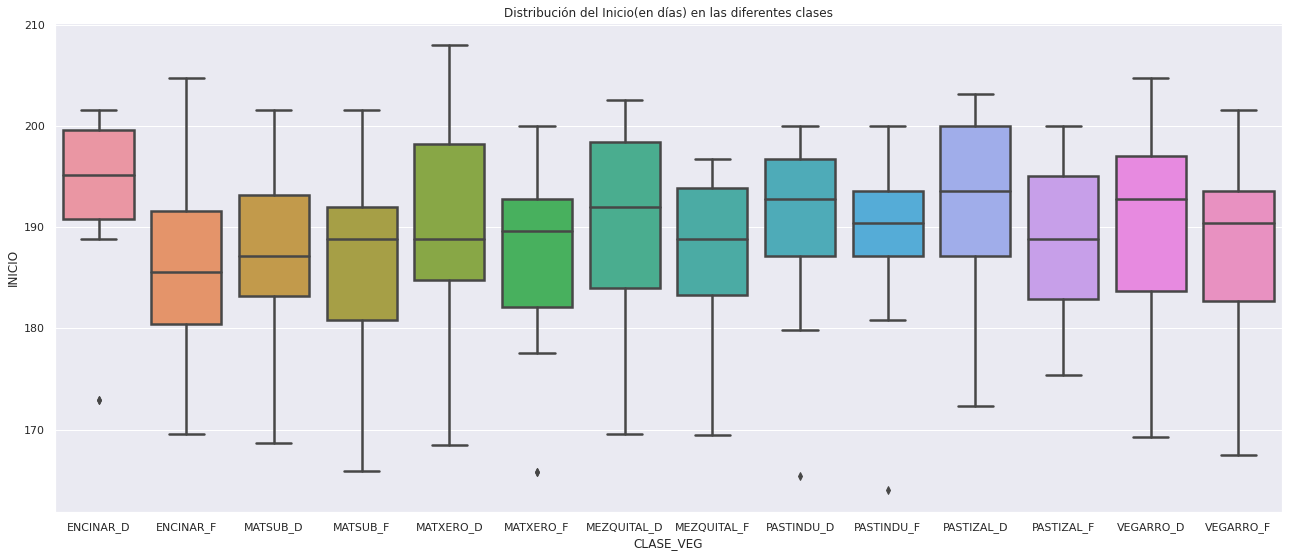

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_evi_limpios, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

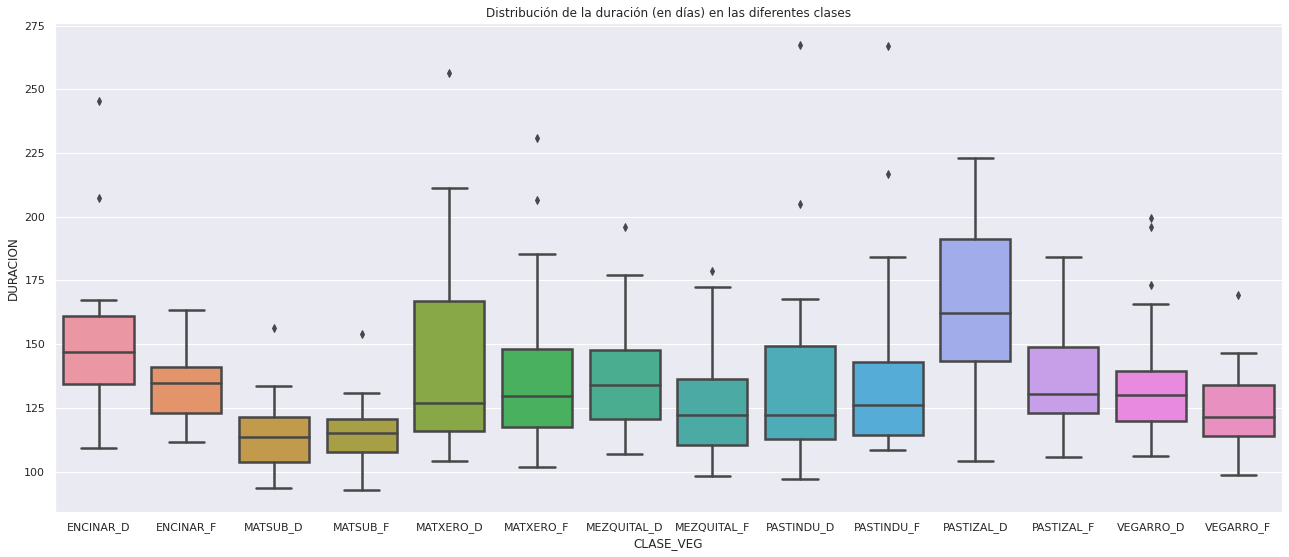

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_evi_limpios, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

## Explorando datos NDVI (variables fenologicas)

### Exploracion inicial

In [ ]:
#Observamos los 5 primeros registros de los datos
datos_ndvi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,11.09,0,177.44,3145,14.41,230.56,70050,33880
1,ENCINAR_D,34.09,23,177.44,3019,18.90,302.40,89970,42230
2,ENCINAR_D,57.69,46,187.04,2814,17.88,286.08,79660,33570
3,ENCINAR_D,81.90,69,206.40,3614,17.36,277.76,83110,39800
4,ENCINAR_D,104.60,92,201.60,2878,18.26,292.16,81110,36720


In [ ]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_ndvi.shape[0]}")
print(f"Columnas: {datos_ndvi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [ ]:
#Cambiando tipo de datos
datos_ndvi['CLASE_VEG'] = datos_ndvi['CLASE_VEG'].astype('category')
datos_ndvi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [ ]:
#Observando valores perdidos
datos_ndvi.isnull().sum()

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [ ]:
duplicate_rows_df = datos_ndvi[datos_ndvi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [ ]:
#Renombrando columnas
datos_ndvi = datos_ndvi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA 

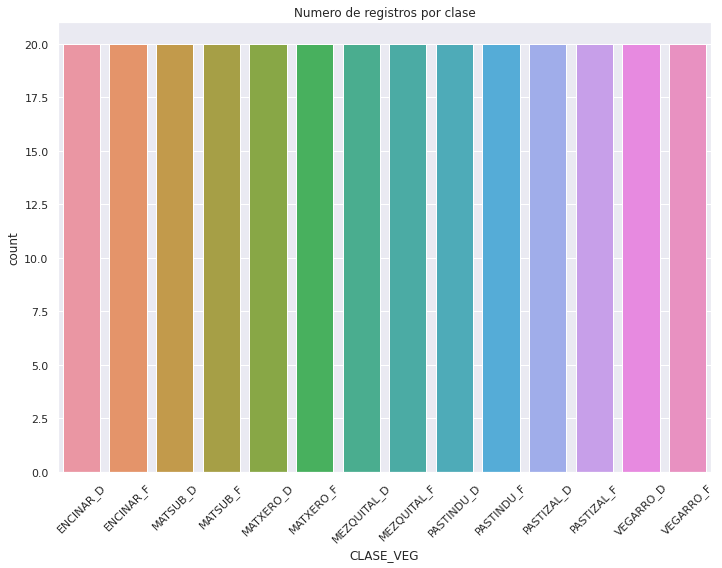

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_ndvi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_ndvi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                 ... INTMEN                     
                mean     min    max  ...    min    max           std
CLASE_VEG                            ...                            
ENCINAR_D    193.896  177.44  206.4  ...  24120  59900   8444.620757
ENCINAR_F    188.624  176.00  203.2  ...  36470  66540   7407.150102
MATSUB_D     188.416  168.00  211.2  ...  27090  67600  11677.159487
MATSUB_F     185.872  165.76  200.0  ...  32490  63830   8878.432709
MATXERO_D    189.632  167.68  209.6  ...  20100  47990   6906.440530
MATXERO_F    186.880  165.12  200.0  ...  22780  43920   5468.167595
MEZQUITAL_D  191.240  169.76  201.6  ...  16990  40170   5766.760903
MEZQUITAL_F  184.904   92.80  203.2  ...  14840  33050   4799.625287
PASTINDU_D   187.992  164.96  201.6  ...  25920  56590   7400.789503
PASTINDU_F   187.288  164.48  201.6  ...  26500  45320   4626.430334
PASTIZAL_D   192.288  172.96  203.2  ...  17300  43170   6261.112731
PASTIZAL_F   187.904  175.52  200.0  ...  27590  49310   6090.795990
VEGARRO_D    190.232  168.64  209.6  ...  25180  53680   6455.855665
VEGARRO_F    187.400  167.04  203.2  ...  31200  57870   6726.309616

[14 rows x 16 columns]

### Histogramas

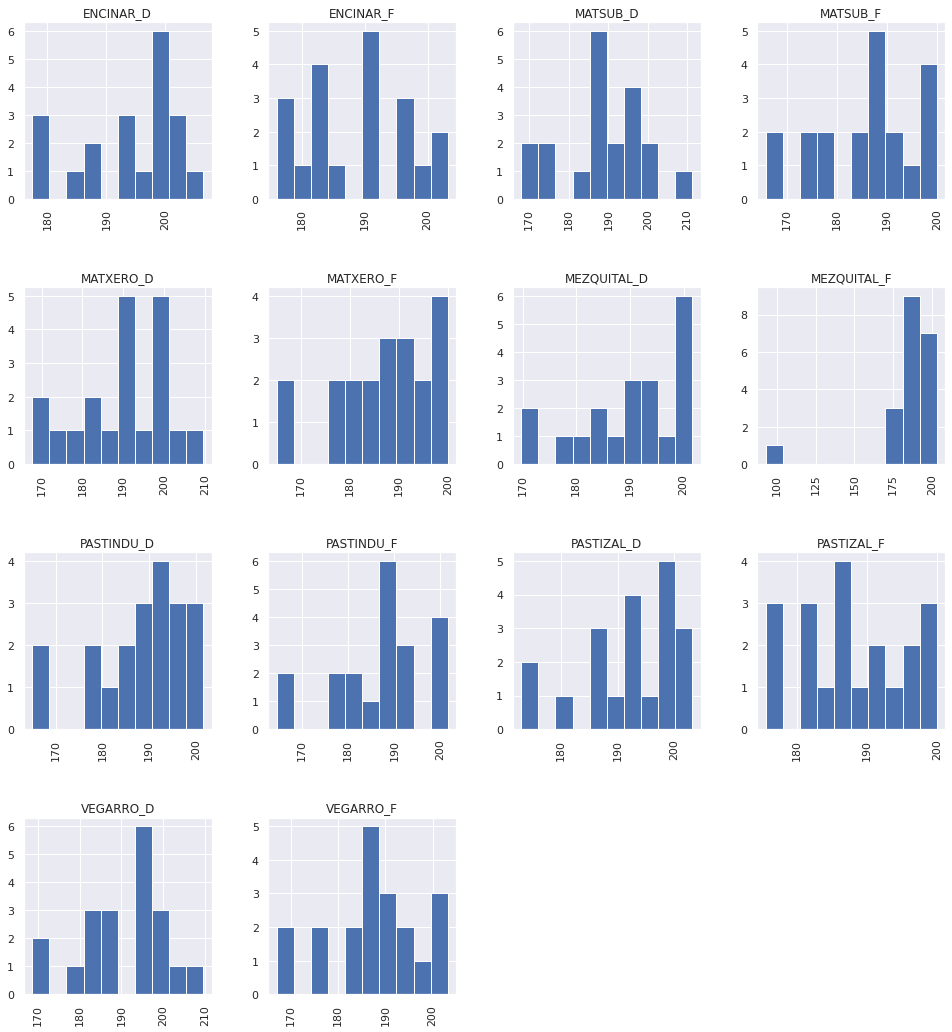

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INICIO']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

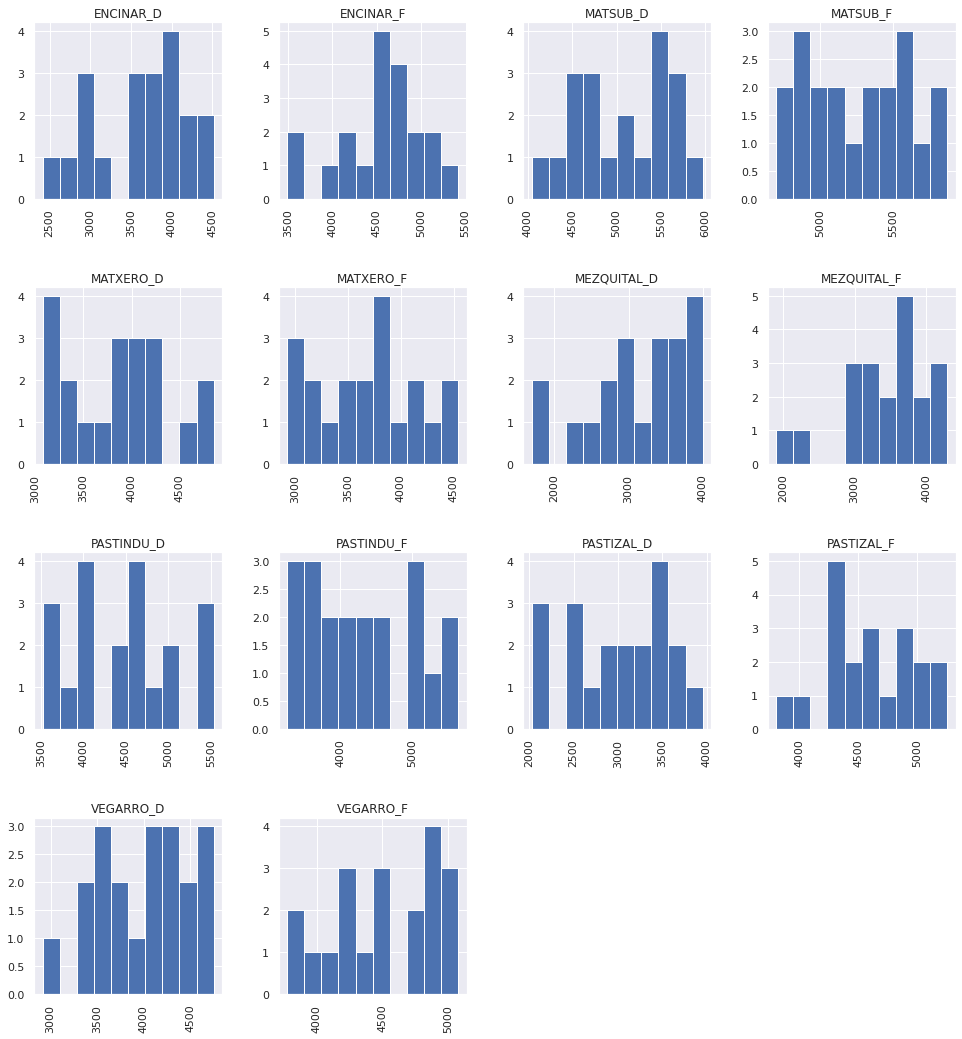

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['AMPLITUD']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

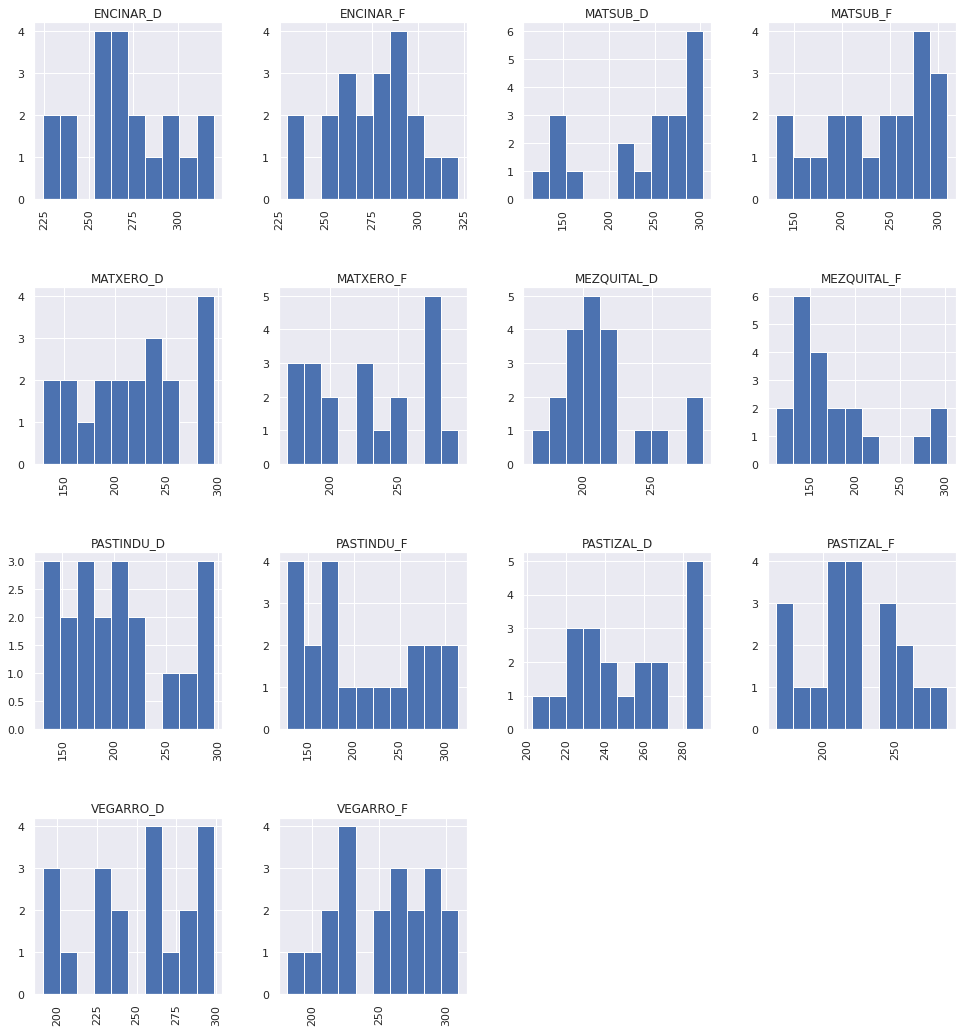

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['DURACION']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

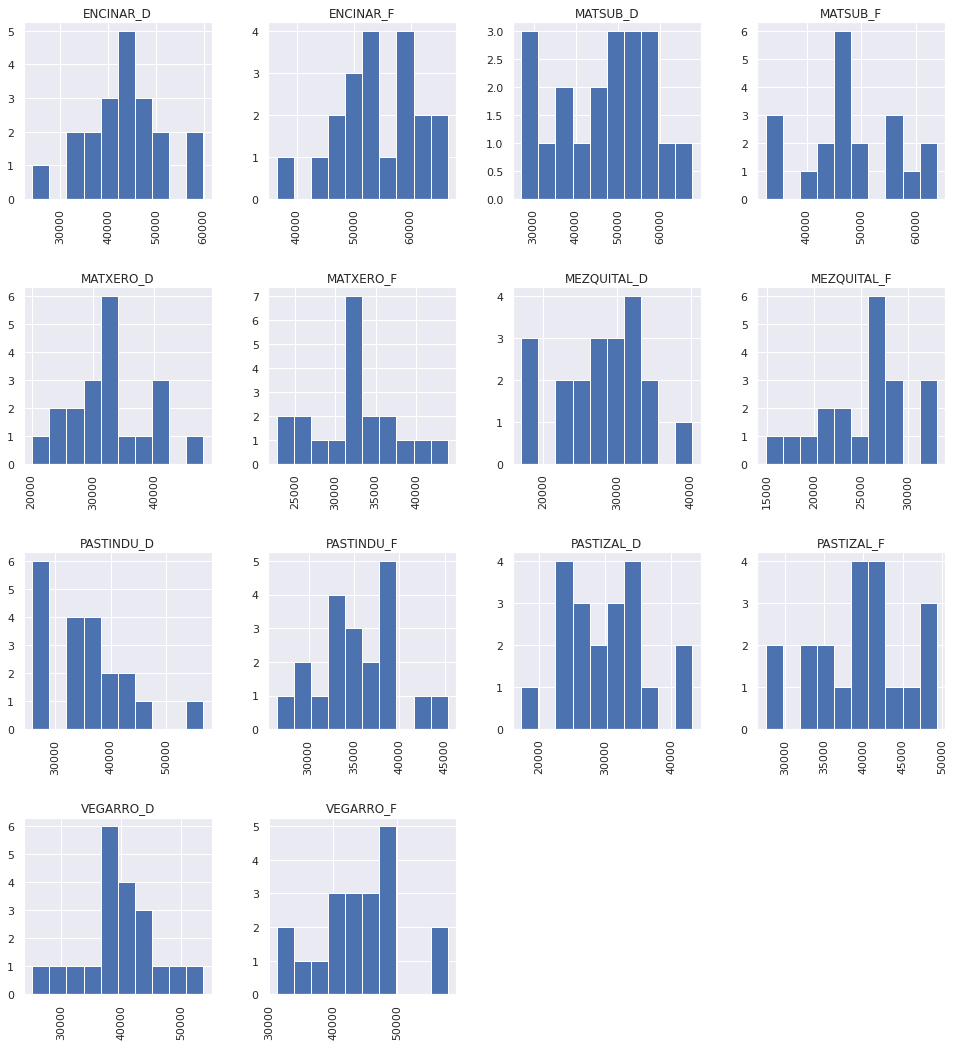

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INTMEN']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de caja


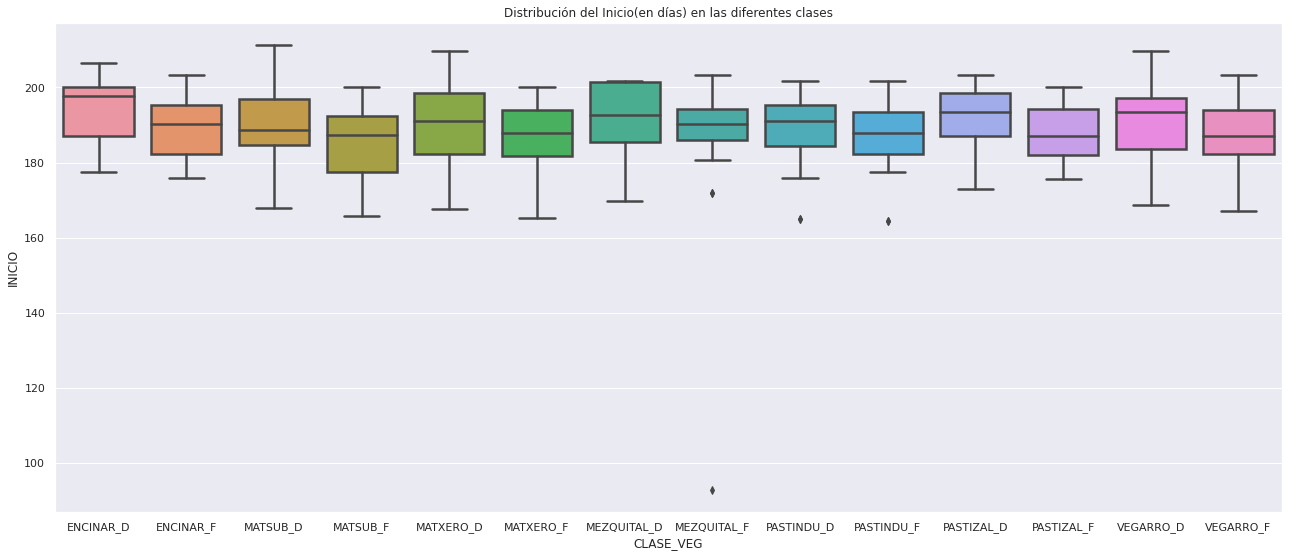

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

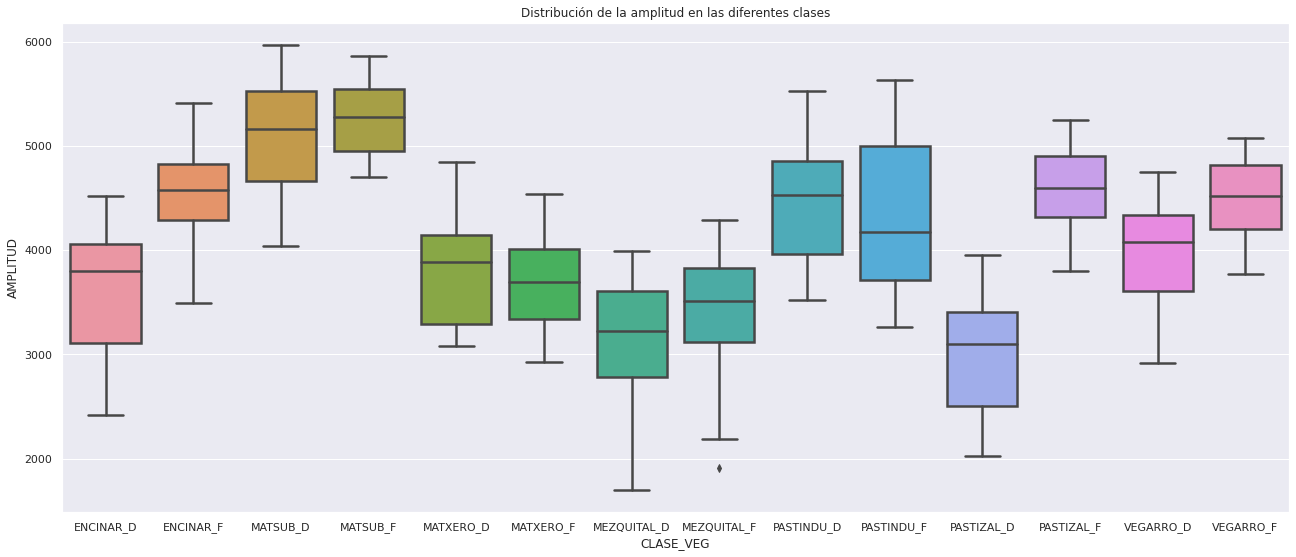

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="AMPLITUD", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la amplitud en las diferentes clases');

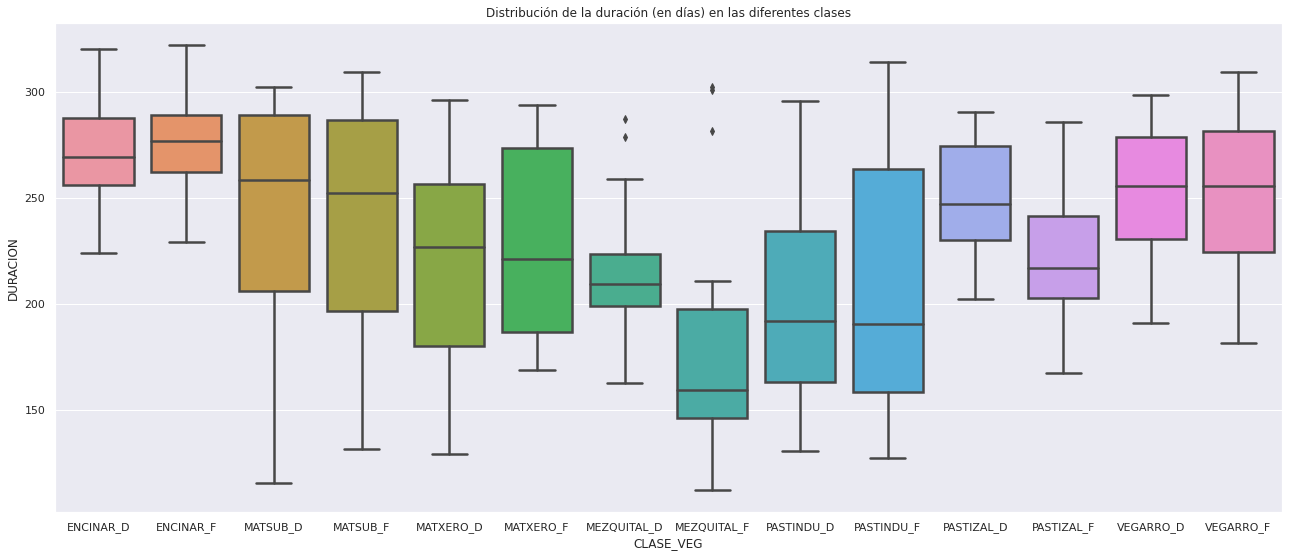

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

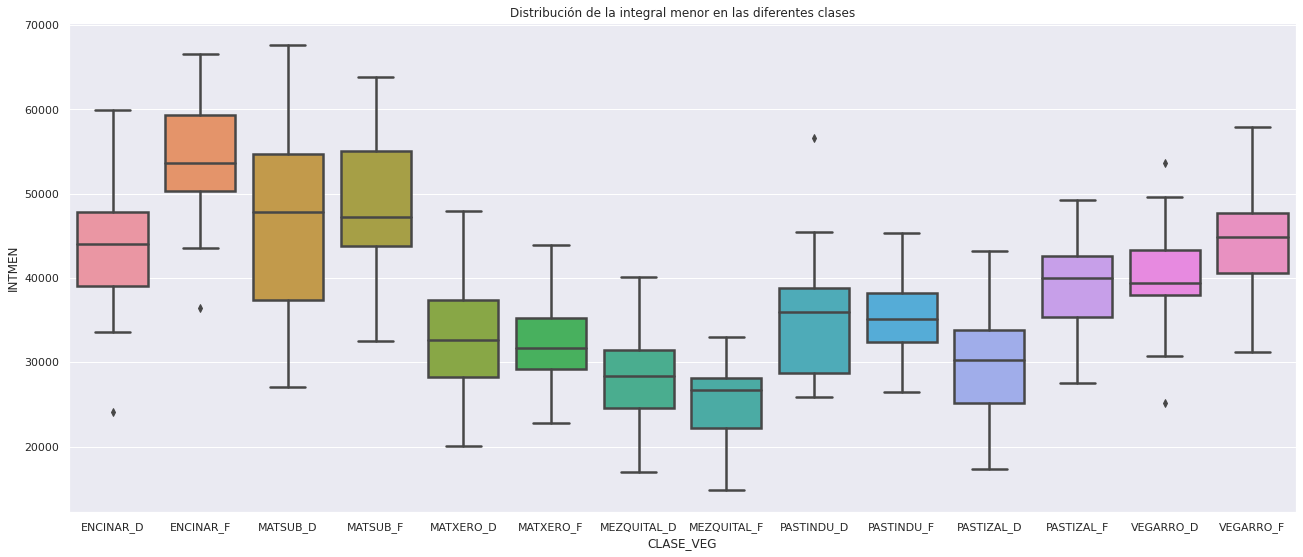

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INTMEN", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la integral menor en las diferentes clases');

### Removiendo Outliers

In [ ]:
#Para remover outliers utilizaremos Isolation Forest
model = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

model.fit(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [ ]:
datos_ndvi['scores'] = model.decision_function(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

datos_ndvi['anomaly_score'] = model.predict(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

In [ ]:
datos_ndvi[datos_ndvi['anomaly_score'] == -1]

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN,scores,anomaly_score
10,ENCINAR_D,241.20,230,179.20,3801,20.000,320.000,113800,58180,-0.020788,-1
19,ENCINAR_D,448.60,437,185.60,3925,19.460,311.360,117800,59900,-0.000935,-1
30,ENCINAR_F,241.00,230,176.00,4507,20.110,321.760,131000,66540,-0.071118,-1
38,ENCINAR_F,425.60,414,185.60,5416,16.590,265.440,110300,62190,-0.000413,-1
39,ENCINAR_F,448.40,437,182.40,4574,19.080,305.280,124500,64810,-0.005341,-1
46,MATSUB_D,151.20,138,211.20,4602,9.129,146.064,56190,27830,-0.036256,-1
48,MATSUB_D,195.80,184,188.80,5968,16.250,260.000,101500,58850,-0.035611,-1
50,MATSUB_D,240.80,230,172.80,5621,18.850,301.600,119500,67600,-0.100704,-1
58,MATSUB_D,425.70,414,187.20,5164,7.224,115.584,47750,27090,-0.033703,-1
60,MATSUB_F,10.36,0,165.76,5078,13.530,216.480,84350,47540,-0.011538,-1


In [ ]:
datos_ndvi_limpios = datos_ndvi[datos_ndvi['anomaly_score'] == 1]

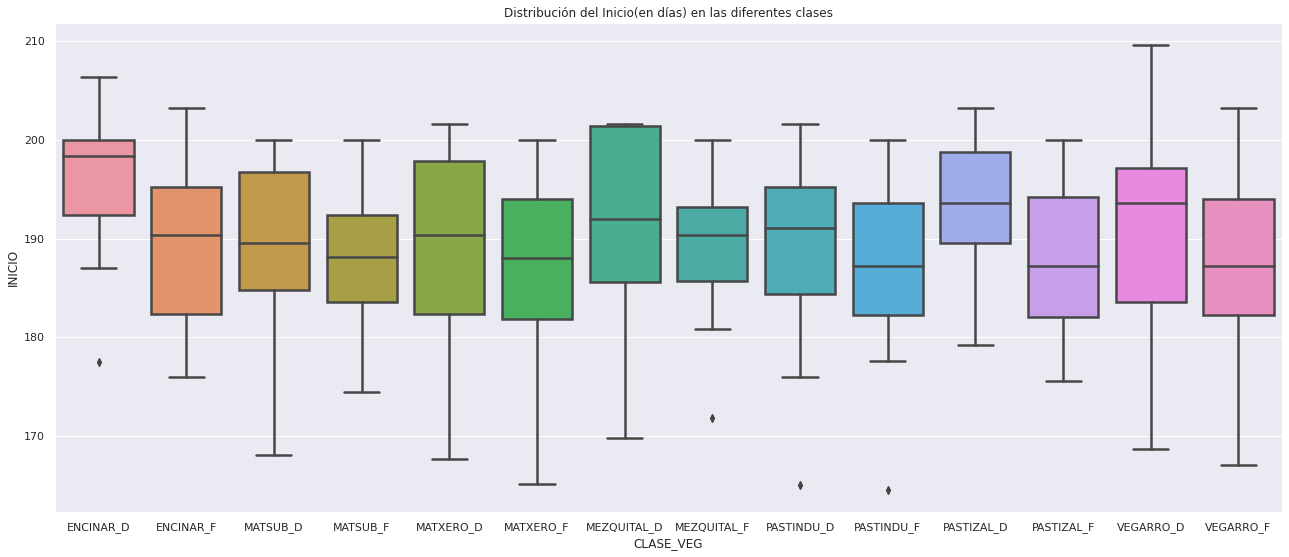

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_ndvi_limpios, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');